# LMECA2300: Advanced Numerical Methods
## Assignment 1

**Students:**
- Student 1: Victor Lepère (61502000)
- Student 2: Name, NOMA ID

### Question 1: Drawing a simple function of 2 variables

The function we chose to draw is the well-known isotropic Gaussian function, defined as
$$
G(x, y) = \frac{1}{ 2 \pi \sigma^2} \exp{\left (-\frac{(x - \mu_x)^2 + (y-\mu_y)^2}{2 \sigma^2} \right )}
$$
For the sake of simplicity, we fix the mean and variance as $\bold \mu = 0$ and $\sigma^2 = 1$.

To plot it in Python, we simply consider a subdomain of its infinite support, e.g. $[-2.5, 2.5] \times [2.5, 2.5]$, that we can discretize as an uniform grid thanks to the `meshgrid` function from NumPy library.
Then, we compute the values of $G$ at these samples and display the resulting (interpolated) function thanks to the `plot_surface` function from Matplotlib library. See the piece of code below.

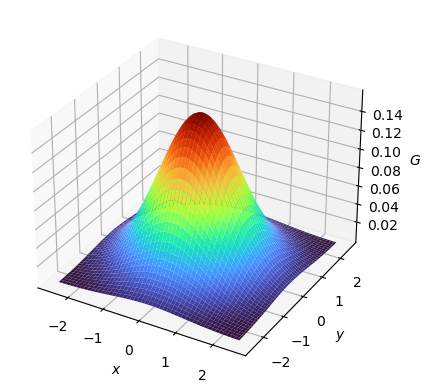

In [4]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

x = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, x)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$G$")

surf = ax.plot_surface(X, Y, G, cmap=cm.turbo, linewidth=0)

### Question 2: Drawing a progressive plane wave
Now, we can compute and visualize on the same domain as above the plane wave given by
$$
P(x,y,t) = P_0 \cos{(\omega t - k x)}
$$
for several values of $t$ such that the consecutive sequence of samples produces an animation of its progression.
Note that we arbitrary choose the amplitude $P_0 = 1$ to enhance visualization with respect to the domain. Similarly, we define the wavevector $k = 4$ to see a few oscillations and the angular frequency $\omega$ is set to $\frac{1}{2}$ to adjust the speed of the animation.

As shown below, the `FuncAnimation` function from Matplotlib library easily enables the animation of the plane wave.

> **Note**: After executing the cell below, start the animation by clicking on the "Play" button on the right. If needed, you can reduce the computational burden of rendering by decreasing the number of `frames` or `plt.rcParams['figure.dpi']`.

In [6]:
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

P = lambda t: np.cos(0.5*t - 4*X)

def animate(t):
    plt.cla()
    ax.plot_surface(X, Y, P(t), cmap=cm.turbo, linewidth=0)

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    ax.set_zlim(-2.5, 2.5)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$P$")

matplotlib.animation.FuncAnimation(fig, animate, frames=25)